In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from math import sqrt
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
import math
import copy

In [2]:
data = pd.read_csv('final_valid_demographic.csv')
N = data.shape[0]
df = pd.DataFrame(data, columns= [
                                  'age', 'enrollment_gestation_age',
                                  'lmp_date', 'lmp_for_program', 
                                  'registration_date', 'date_registration_hospital', 'entry_date',  
                                  'delivery_date', 'edd', 'delivery_date_for_program', 
                                  'term_of_delivery', 'place_of_delivery', 'type_of_delivery',
                                  'enrollment_delivery_status', 'registered_pregnancy', 'ppc_cesarean', 
                                  'current_stage_id', 'channel_type', 'education_id', 'income_bracket', 
                                  'g', 'p', 's', 'l', 'a', 'channel_id',
                                  'registered_where', 'planned_place_of_delivery', 
                                  'true_lmp_date', 'true_gest_age',
                                  'is_delivered', 
                                  'is_ppc_cesarean', 'is_full_term', 'is_pre_term', 'is_private_place', 
                                  'is_guv_place', 'is_home_place', 'is_other_place', 'is_normal_type', 
                                  'is_cesarean_type', 'is_private_reg', 'is_guv_reg', 'is_private_plan', 
                                  'is_guv_plan', 'is_other_plan', 
                                  'stage_1', 'stage_2', 'stage_3', 'stage_4', 
                                  'ch_type_1', 'ch_type_2', 'ch_type_3', 'ch_type_4', 
                                  'edu_1', 'edu_2', 'edu_3', 'edu_4', 'edu_5', 'edu_6', 'edu_7', 
                                  'income_1', 'income_2', 'income_3', 'income_4', 'income_5', 'income_6', 'income_7',
                                 ])

/opt/anaconda3/envs/rmnenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
gest_age_error = df.true_gest_age / 7 - df.enrollment_gestation_age
print(np.var(gest_age_error))

1.8241122105811378


In [4]:
labels = df.true_gest_age
labels = np.reshape(labels, (N))
features_ = [
            df['age'], df['registered_pregnancy'],  
            df['g'], df['p'], df['s'], df['l'], df['a'], 
            df['is_ppc_cesarean'],  
            df['is_full_term'], df['is_pre_term'], 
            df['is_delivered'], 
            df['is_private_place'], df['is_guv_place'], df['is_home_place'], df['is_other_place'], 
            df['is_normal_type'], df['is_cesarean_type'],
            df['is_private_reg'], df['is_guv_reg'], 
            df['is_private_plan'], df['is_guv_plan'], df['is_other_plan'],
            df['stage_1'], df['stage_2'], df['stage_3'], df['stage_4'], 
            df['ch_type_1'], df['ch_type_2'], df['ch_type_3'], df['ch_type_4'], 
            df['edu_1'], df['edu_2'], df['edu_3'], df['edu_4'], df['edu_5'], df['edu_6'], df['edu_7'], 
            df['income_1'], df['income_2'], df['income_3'], df['income_4'], df['income_5'], 
            df['income_6'], df['income_7'], 
           ]
features = np.array(features_)
features = features.transpose()

In [7]:
print(features.shape)

(117855, 44)


0.08674083084705708


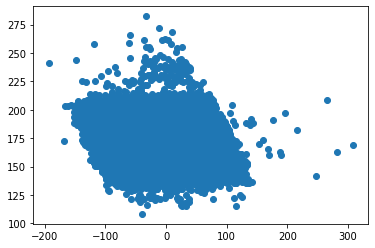

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.30)
regr = LinearRegression()
model = regr.fit(x_train, y_train)
print(model.score(x_test, y_test))
predictions = regr.predict(x_test)
# print(mean_squared_error(y_test, predictions))
residuals = y_test - predictions
plt.scatter(residuals,predictions)
plt.show()

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(8,4), activation='relu', solver='adam', max_iter=50)
mlp.fit(x_train,y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print(mlp.score(x_test, y_test))
# print(mean_squared_error(y_test, predict_test))

/opt/anaconda3/envs/rmnenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.006646491500975762
